# Air Quality Analyis of an Office Space
By: Sandijs Vasilevskis [Email](sandijs.vasilevskis@gmail.com)

For: MOBISTYLE Project
[LINK](https://www.mobistyle-project.eu/en/mobistyle)
[Documentation](https://data-analysis-mobistyle.readthedocs.io/en/latest/)
[GitHub](https://github.com/SVGoogle/Data-Analysis-MOBISTYLE)


## Table of Contents
- [Introduction](#intro)
- [Data Wrangling](#wrangling)
- [Exploratory Data Analysis](#eda)
- [Summary](#summary)

<a id='intro'></a>
# Introduction


> This dataset contains of time series data with almost two year long indoor air quality meausurements of an office space in building of University of Ljublana (UL) in Slovenia, Europe.

## Plotting environment setup
Choosing different colors to represent:
* MOBISTYLE and BASELINE monitoring periods
* Indoor air quality comfort category ranges

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style(style='whitegrid', 
              rc={'figure.figsize': (11.7,8.27), 'xtick.major.size': 12, 'ytick.major.size': 12,
             'font.size': 14, 'axes.titlesize': 14, 'axes.labelsize': 14})

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
c:\programdata\anaconda3\envs\udacity\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


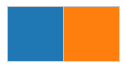

In [2]:
# Colors for plots
current_pallete =  sns.color_palette()
pallete = sns.color_palette().as_hex()

# Hex codes for BASELINE and MOBISTYLE colors
color_BL = '#1f77b4'
color_MS = '#ff7f0e'
color_other = '#2ca02c'
color_out = '#7f7f7f'
color_missing = 'lightgrey'

# Create dictionary pallete for Monitoring period
pal = dict(MOBISTYLE=color_MS, BASELINE=color_BL)

# Plot Colors for BASELINE and MOBISTYLE
sns.palplot([color_BL, color_MS])

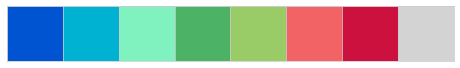

In [3]:
# Set bins and labels for Indoor environmental parameters
# The bin ranges ar based on an European building design standard DS/EN 15251:2007
bins_TEMP, bins_RH = [-10000, 19, 20, 21, 23, 24, 25, 10000], [-10000, 20, 25, 30, 50, 60, 70, 10000]
bins_CO2, bins_VOC = [-10000, 750, 900, 1200, 10000], [-10000, 40, 80, 100, 10000]

labels_T_RH = ['Cat -IV','Cat -III', 'Cat -II','Cat I', 'Cat +II','Cat +III','Cat +IV']
labels_CO2_VOC = ['Cat I', 'Cat II', 'Cat III', 'Cat IV']

# RGB codes for Comfort category colors
cmap_T_RH = [(0, .33, .82), (0, .7, .82), (.5, .95, .75), (.3, .7, .4), (.6, .8, .4), (.95, .39, .4), (.8, .07, .25), 'lightgrey']
cmap_CO2_VOC = [(.3, .7, .4), (.6, .8, .4), (.95, .39, .4), (.8, .07, .25), 'lightgrey']

# Plot diverging color pallete for Temperature and relative humidity categories
# Grey color for the missing data
sns.palplot(cmap_T_RH)

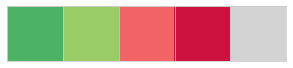

In [4]:
# Plot color pallete for CO2 and VOC level categories
# Grey color for the missing data
sns.palplot(cmap_CO2_VOC)

<a id='wrangling'></a>
# Data Wrangling

Before exploratory data analysis preliminary data wrangling was performed, see `'data_exploration.ipynb'` for further details.

In this chapter the dataset is loaded and its variables are described in order to motivate data exploration goals.

## Load Office Air Quality and Outdoor Climate Data

In [5]:
# Assign categorical data types before reading CSV file
dtypes = {
    'Monitoring_Period': 'category',
    'Season': 'category',
    'Category_TEMP': 'category',
    'Category_RH': 'category',
    'Category_CO2': 'category',
    'Category_VOC': 'category',
}

# read CSV file
df = (pd.read_csv('./Files/office_air_quality_data.csv',                    
                    parse_dates=True,
                    dtype=dtypes,
                    index_col='Timestamp')
       )

### What is the structure of the dataset?

Dataset contains **indoor and outdoor air parameter measurements**, window opening state and data on if the employees are present at the office, temperature setpoint regulation, heating and cooling valve operation.

Almost **2 year time series** data with 15 minutes observation intervals.

This data can further be divided into two monitoring periods, denominated as:
* `'BASELINE'` - First year of the monitoring to get reference data on the specific office space (with no interventions).
* `'MOBISTYLE'` - Second year of the monitoring, when employees are given a mobile app and sensors with LED lights (signaling a bad air quality in the office room) are installed. 


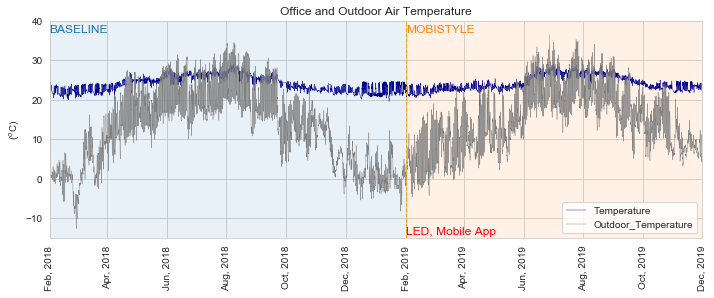

In [6]:
fig, ax = plt.subplots(figsize=(11.7, 4), sharex=True)

df.loc[:, ['Temperature', 'Outdoor_Temperature']].plot(title='Office and Outdoor Air Temperature', color=['darkblue', 'grey'],
                                                       linewidth=.4, ax=ax)
ax.axvline(x='02-01-2019', color='orange', linestyle='--', linewidth=1)
ax.fill_between(df.loc['02-01-2019':, :].index.values, -15, 40, facecolor=color_MS, alpha=0.1)
ax.fill_between(df.loc[:'02-01-2019', :].index.values, -15, 40, facecolor=color_BL, alpha=0.1)
ax.text(x='02-01-2019', y=-14, s='LED, Mobile App', color='red', size=12);
ax.text(x='02-01-2019', y=37, s='MOBISTYLE', color=color_MS, size=12);
ax.text(x='02-01-2018', y=37, s='BASELINE', color=color_BL, size=12);
ax.set(ylim=(-15,40), xticks=pd.date_range(start='2018-02-1', periods=12, freq='2MS'), xlabel='', ylabel='($^o$C)');
ax.set_xticklabels(pd.date_range(start='2018-02-1', periods=12, freq='2MS').strftime('%b, %Y'), rotation=90);

* BASELINE and MOBISTYLE monitoring periods are 12 months and 10 months long, respectively.
* Outdoor temperature differences between year 2018 and 2019 can be observed.
* Summmer and winter indoor air temperature fluctuations for each monitoring period can be observed. Due to the fact that the building is mechanically conditioned and has different HVAC system set-point values for each season.



### What kind of variable types are present?

**Continuous variables**
* `Indoor air parameters` like Temperature, Relative Humidity(RH), Carbon Dioxide (CO2) and Volatile Organic Compunds (VOC) levels
* `Outdoor air parameters` like Temperature, RH, Global radiation, Diffuse radiation

**Categorical Variables**
* `Season`: Heating or Cooling season of the year
* `Monitoring period`: BASELINE and MOBISTYLE
* `Room status`: 0 - unoccupied room, 1 - occupied room
* `Window state`: 0 - closed window, 1 - open window
* `Window state change`: 1 - opening of the window, 0 - no change,-1 is closing of the window


* `Comfort categories`: Indoor Air Quality (IAQ) of the Temperature, RH, CO2, VOC are labeled within specific paremeter ranges based on an European building design standard DS/EN 15251:2007 (see the Plotting setup section above for more details)
    - Temperature and RH are divided into **7 categories**
    - CO2 and VOC levels are divided into **4 categories**
    - Category I is the best IAQ comfort category 
    - **Category II** is the accepted level that it is aimed for in the office design and operation stage

In [7]:
# Variable dtypes
# Note: Due to np.nan values Room status, Window state and change are represent as float type
df.dtypes

Room_Status             float64
Window_State            float64
Window_State_Change     float64
CO2                     float64
RH                      float64
VOC                     float64
Temperature             float64
Monitoring_Period      category
Season                 category
Category_TEMP          category
Category_RH            category
Category_CO2           category
Category_VOC           category
Outdoor_Temperature     float64
Outdoor_RH              float64
Global_radiation        float64
Diffuse_radiation       float64
dtype: object

### What is the research question?
> **The alternative hypothesis for this project is that the employee use of mobile app and installing sensors with LED lights (that signalize high CO2 levels) would improve the air quality in the office, and would also urge the employees to open the windows more often and keep windows open for a longer period of time than before.**

### What is/are the main feature(s) of interest in your dataset?

Main interest of this dataset is to investigate if during the second monitoring period, denominated as `'MOBISTYLE'` the:
1. **Indoor Air Quality** (IAQ) parameters like Temperature, Relative Humidity, Carbon Dioxide and Volatile Organic Compound levels have improved, namely more time in Comfort Category I and **Category II**


2. **Window use** of the office has increased, namely if employees open the windows more frequently and **keep windows open** for a longer period of time compared to the 'BASELINE'

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Comparison of IAQ parameter distribution between both monitoring periods. Estimate indoor air parameter correlation with outdoor climate measurements. It is important to compare the outdoor climate difference between `'MOBISTYLE'` and `'BASELINE'`, because one measurement year could have been warmer/or colder than the other and thus have an impact to the data comparison. Also take into account the seasonality of the monitoring data by dividing the data into - Heating and Cooling seasons.

> Dataset constains 15 minutes values including weekends and night time. Therefore, before conducting the anlaysis, the dataset must be filtered for the time only when the employees are present in the office in order to account properly for the indoor climate parameters during working hours.

In [8]:
# Filter the data, exclude the time outsied working hours
data = df.query('Room_Status == 1')

# Verify that all values are equal to 1 (Office room occupied)
assert data['Room_Status'].all() == 1

# Dataset was reduced by almost 2/3 after filtering
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21248 entries, 2018-02-01 08:15:00 to 2019-11-29 17:15:00
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Room_Status          21248 non-null  float64 
 1   Window_State         21248 non-null  float64 
 2   Window_State_Change  21243 non-null  float64 
 3   CO2                  18211 non-null  float64 
 4   RH                   18211 non-null  float64 
 5   VOC                  18211 non-null  float64 
 6   Temperature          21248 non-null  float64 
 7   Monitoring_Period    21248 non-null  category
 8   Season               21248 non-null  category
 9   Category_TEMP        21248 non-null  category
 10  Category_RH          18211 non-null  category
 11  Category_CO2         18211 non-null  category
 12  Category_VOC         18211 non-null  category
 13  Outdoor_Temperature  21248 non-null  float64 
 14  Outdoor_RH           21248 non-null

<a id='eda'></a>
# Exploratory Data Analysis

The main purpose of this project is to compare if there are any air quality improvements during the `MOBISTYLE` monitoring periods.

It may be hard to evaluate the differences by comparing raw 15 minute values by plotting yearly temperature changes as the data flcutuates a lot, thus the dataset must be compared at larger time scales.

The further investigation of the air quality parameters will be performed by increasing the timestep from original 15 minutes to monthly, then to seasonal (heating, cooling) comparison, and in the end to whole monitoring period `MOBISTYLE` vs `BASELINE` will be compared.

## Univariate Exploration
> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Investigate Continuous variables

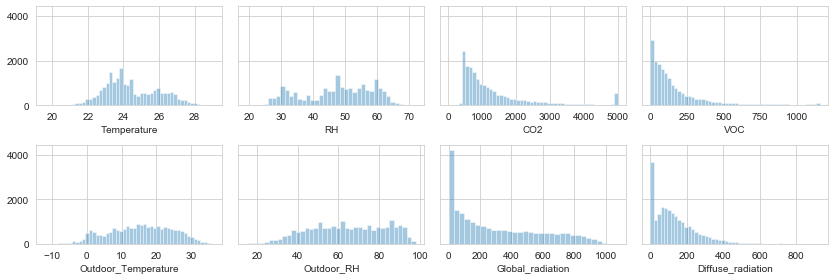

In [9]:
fig, axes = plt.subplots(2,4, figsize=(11.7, 4), sharey=True)

air_cols = ['Temperature', 'RH', 'CO2', 'VOC', 'Outdoor_Temperature', 
            'Outdoor_RH', 'Global_radiation', 'Diffuse_radiation']
kws = dict(kde=False, hist=True, kde_kws={'shade': True})

for col, ax in zip(air_cols, axes.flat):
    sns.distplot(data[col], **kws, color=color_BL, ax=ax);
plt.tight_layout()

### Invesigate Monitoring Period differences

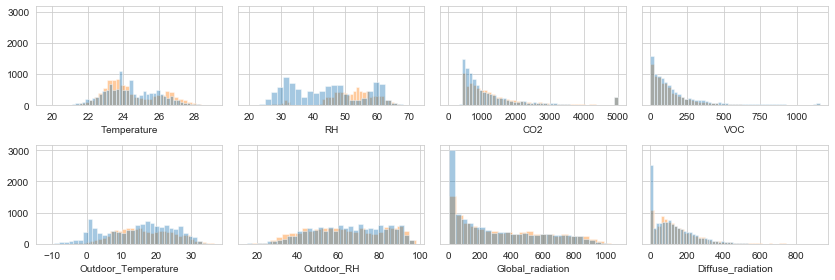

In [10]:
fig, axs = plt.subplots(2,4, figsize=(11.7, 4), sharey=True)
(ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8) = axs
kws = dict(kde=False, hist=True, kde_kws={'shade': True})

for period, color in pal.items():
    df_plot = data.query(f'Monitoring_Period == "%s"'% period);
    
    # Indoor
    sns.distplot(df_plot['Temperature'], **kws, color=color, ax=ax1);
    sns.distplot(df_plot['RH'], **kws, color=color, ax=ax2);
    sns.distplot(df_plot['CO2'], **kws, color=color, ax=ax3);
    sns.distplot(df_plot['VOC'], **kws, color=color, ax=ax4);
    # Outdoor
    sns.distplot(df_plot['Outdoor_Temperature'], **kws, color=color, ax=ax5);
    sns.distplot(df_plot['Outdoor_RH'], **kws, color=color, ax=ax6);
    sns.distplot(df_plot['Global_radiation'], **kws, color=color, ax=ax7);
    sns.distplot(df_plot['Diffuse_radiation'], **kws, color=color, ax=ax8);  

plt.tight_layout()   

Investigate closer Temperature and RH parameters as they have two peaks - indicating sesonal differences

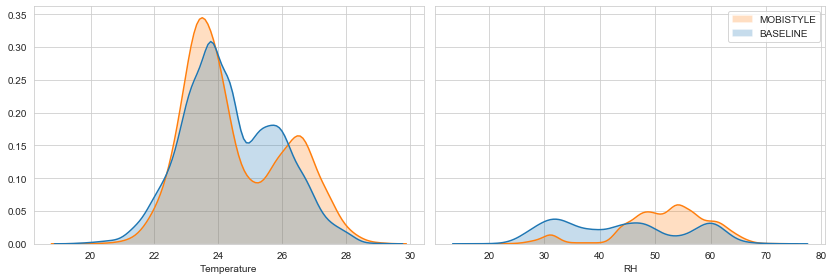

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11.7, 4), sharey=True)
kws = dict(kde=True, hist=False, kde_kws={'shade': True})

for period, color in pal.items():
    df_plot = data.query(f'Monitoring_Period == "%s"'% period);
    sns.distplot(df_plot['Temperature'], **kws, color=color, bins=np.arange(16, 30, .5), ax=ax1);
    sns.distplot(df_plot['RH'], **kws, color=color, bins=np.arange(0, 100, 5), ax=ax2);    

plt.legend(pal.keys())
plt.tight_layout()  

From kernel density plots and histograms two clear peaks for the office temperature can be observed. This indicates clear seasonal differences for parameters like Temperature and also to some extent for the RH. CO2 and VOC levels don't have such distributions.

## Investigate Seasonal differences
The data at first level is grouped by the Monitoring period:
* `'MOBISTYLE'` 
* `'BASELINE'`

Afterwards it is further grouped into summer and winter periods, or as denoted here for:
* `'HEATING'`
* `'COOLING'`

This is important because air parameters like temperature, relative humidity are depend on the season of the year. As we could se in the previous comparison.

Also monthly parameter distributions are created to look closer at the summer months.

### Outdoor Climate Data
First, investigate monthly outdoor climate differences.

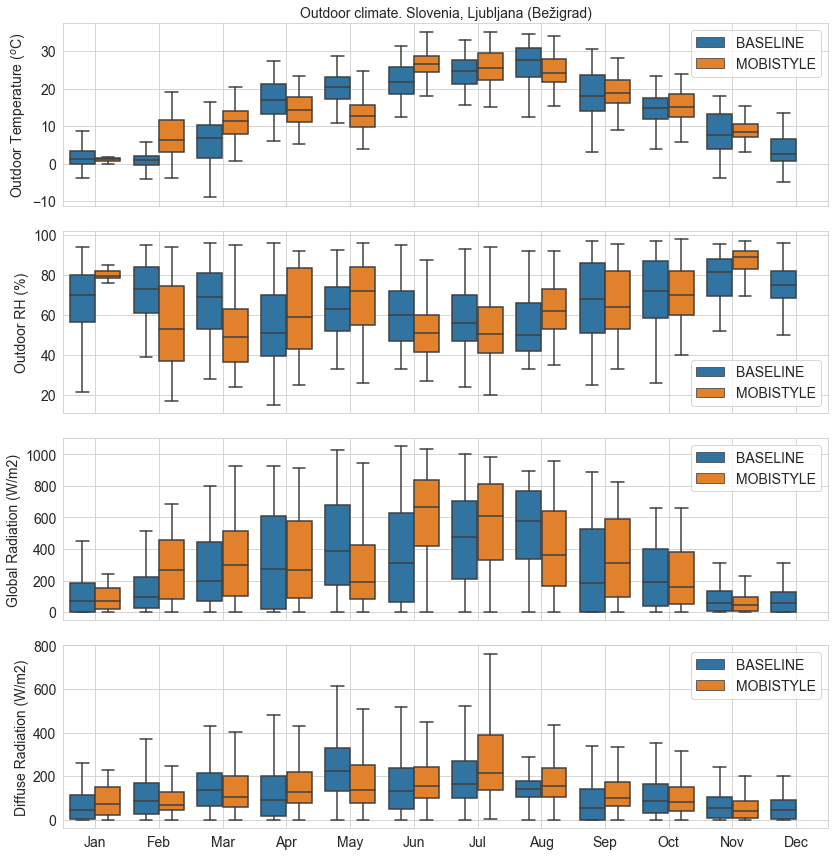

In [12]:
fig, axes = plt.subplots(4,1, figsize=(11.7, 12), sharex=True)

for col, ax in zip(air_cols[4:], axes.flat):
    sns.boxplot(data=data, x=data.index.month, y=col, hue='Monitoring_Period',
                showfliers=False, palette=[color_BL, color_MS], ax=ax)
    ax.set_xlabel('', fontsize=14)
    ax.set_xticklabels(pd.date_range(start='2018-1-1', periods=12, freq='MS').strftime('%b'), rotation=0)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.legend(fontsize=14)
    ax.xaxis.grid(True)
    
axes[0].set_title('Outdoor climate. Slovenia, Ljubljana (Bežigrad)', fontsize=14)    
axes[0].set_ylabel('Outdoor Temperature ($^o$C)', fontsize=14)
axes[1].set_ylabel('Outdoor RH (%)', fontsize=14)
axes[2].set_ylabel('Global Radiation (W/m2)', fontsize=14)
axes[3].set_ylabel('Diffuse Radiation (W/m2)', fontsize=14)
plt.tight_layout()

### Office Air Quality Data

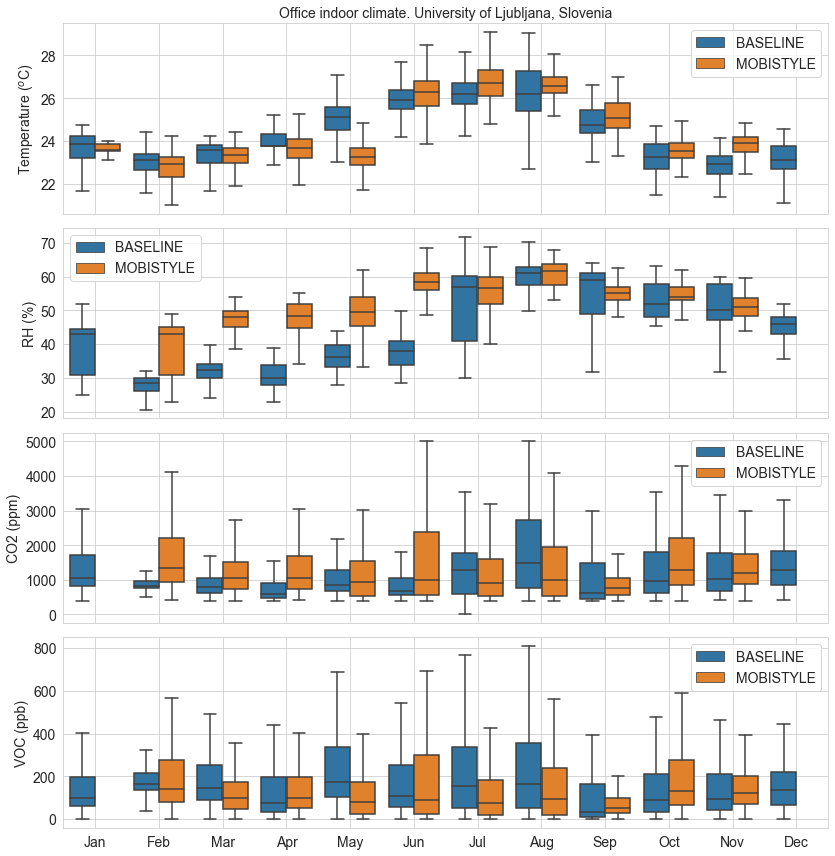

In [13]:
fig, axes = plt.subplots(4,1, figsize=(11.7, 12), sharex=True)

for col, ax in zip(air_cols[:4], axes.flat):
    sns.boxplot(data=data, x=data.index.month, y=col, hue='Monitoring_Period',
                showfliers=False, palette=[color_BL, color_MS], ax=ax)
    ax.set_xlabel('', fontsize=14)
    ax.set_xticklabels(pd.date_range(start='2018-1-1', periods=12, freq='MS').strftime('%b'), rotation=0)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.legend(fontsize=14)
    ax.xaxis.grid(True)
    
axes[0].set_title('Office indoor climate. University of Ljubljana, Slovenia', fontsize=14)    
axes[0].set_ylabel('Temperature ($^o$C)', fontsize=14)
axes[1].set_ylabel('RH (%)', fontsize=14)
axes[2].set_ylabel('CO2 (ppm)', fontsize=14)
axes[3].set_ylabel('VOC (ppb)', fontsize=14)
plt.tight_layout()

Observations for IAQ parameter diffences:
* Office air temperatures are lower for the May month during MOBISTYLE year, the same was observed for outdoor temperature
* RH higher from February to June for the MOBISTYLE period

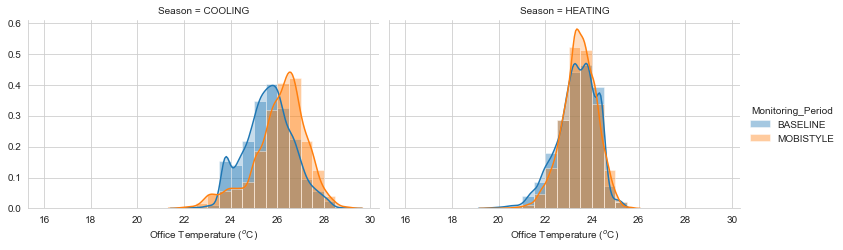

In [14]:
# Create Kernel Density plots without histograms to overlay the distributions
g = sns.FacetGrid(data, col='Season', hue='Monitoring_Period',
                  height=3.5, aspect=1.5, palette=pal)
g = (g.map(sns.distplot, 'Temperature', bins=np.arange(16, 30, .5), 
           kde=True, hist=True, kde_kws={'shade': True})
     .add_legend()
    .set_xlabels('Office Temperature ($^o$C)'))

### Window Data
Investigate the following window data:
* Number of times openings (count)
* Average time with open window (pct)

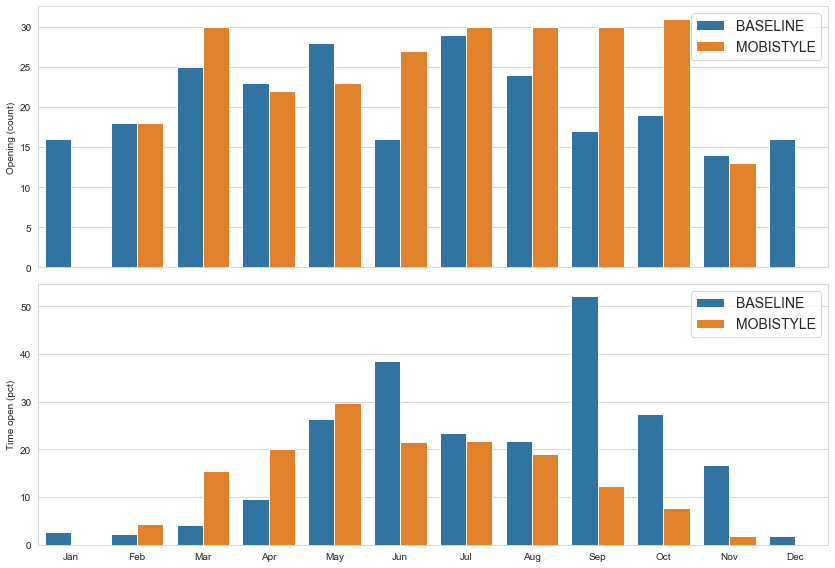

In [15]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(11.7, 8), sharex=True)

# Resample montlhy window opening count and average time open
df_OP = df[['Window_State_Change']].resample('MS').apply(lambda x: x.isin([1]).sum())
df_OP['Window_State'] = df[['Window_State']].resample('MS').mean() * 100
df_OP.loc[:'2019-02-1', 'Monitoring_Period'] = 'BASELINE'
df_OP.loc['2019-02-1': , 'Monitoring_Period'] = 'MOBISTYLE' 

# Plot
sns.barplot(data=df_OP, x=df_OP.index.month, y='Window_State_Change', hue='Monitoring_Period',
            palette=pal, ax=ax1);
sns.barplot(data=df_OP, x=df_OP.index.month, y='Window_State', hue='Monitoring_Period',
            palette=pal, ax=ax2);

# Format axes
ax1.set(ylabel='Opening (count)', xlabel='')
ax2.set(ylabel='Time open (pct)', xlabel='')
ax2.set_xticklabels(pd.date_range(start='2018-1-1', periods=12, freq='MS').strftime('%b'), rotation=0)
[ax.legend(loc='upper right', fontsize=14) for ax in (ax1, ax2)]
plt.tight_layout()

## Comfort Categories
Count time in each category, group by monitoring period and season

### Temperature comfort level
* BASELINE has more time in Category I and Category II during the COOLING season
* During the HEATING season both monitoring periods have similar comfort category distribution

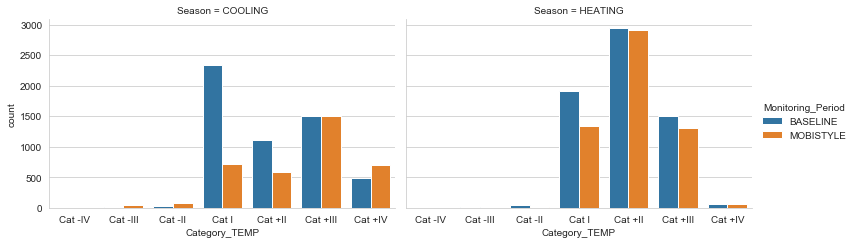

In [16]:
g = sns.catplot(x='Category_TEMP', hue='Monitoring_Period', col='Season',
                data=data, kind='count', order=labels_T_RH,
                height=3.5, aspect=1.5);

In [17]:
# Create a function to count categories, return a DataFrame
def stats_category(df, cat_name):
    """
    This f-n calculates time distribution of indoor air parameters in comfort categories 
    and percentage of missing data.
    """
    if cat_name in ('Category_TEMP', 'Category_RH'):
        df_cat = pd.DataFrame(0, index=[cat_name], columns=labels_T_RH + ['Missing data'])
        for cat in labels_T_RH:
            df_cat.loc[cat_name, cat] = df[cat_name].isin([cat]).sum() * 100 / len(df[cat_name])
    else:
        df_cat = pd.DataFrame(0, index=[cat_name], columns=labels_CO2_VOC + ['Missing data'])
        for cat in labels_CO2_VOC:
            df_cat.loc[cat_name, cat] = df[cat_name].isin([cat]).sum() * 100 / len(df[cat_name])    
    df_cat.loc[cat_name, 'Missing data']  = df[cat_name].isna().sum() * 100 / len(df[cat_name])
    
    return df_cat.fillna(0)

stats_category(data, 'Category_TEMP')

Cat -IV  Cat -III   Cat -II      Cat I    Cat +II   Cat +III  \
Category_TEMP  0.028238  0.305911  0.814194  29.725151  35.485693  27.409639   

                Cat +IV  Missing data  
Category_TEMP  6.231175           0.0

In [20]:
# Function to plot text in the middel of horizontal barcharts
# Input params: DataFrame and Axes object
def set_barh_text(df, ax):
    for rowNum, row in enumerate(df.fillna(0.).values):        
        xpos = 0
        for val in row:
            xpos += val
            ax.text(xpos - val/2, rowNum, np.where((val >1.), f'{int(round(val))}', ''), color='white', ha='center', va='center', fontsize=10) 

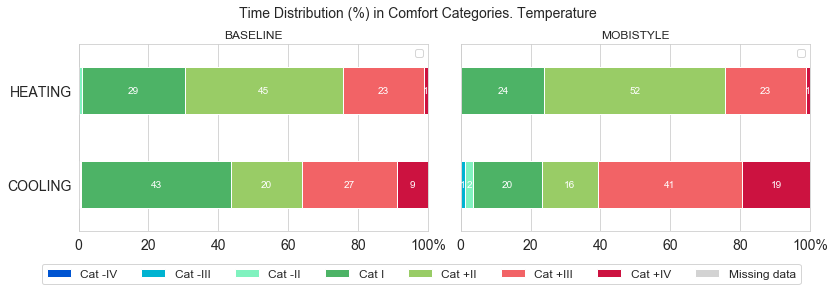

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11.7, 4), sharey=True)

# Group comfort catgory data for each period and season
df_cat_T = (data
            .groupby(['Monitoring_Period', 'Season']).apply(stats_category, 'Category_TEMP')
            .reset_index().set_index('Season')
           )
BL_T = df_cat_T.query('Monitoring_Period == "BASELINE"').loc[:, labels_T_RH + ['Missing data']]
MS_T = df_cat_T.query('Monitoring_Period == "MOBISTYLE"').loc[:, labels_T_RH + ['Missing data']]

# Plot
BL_T.plot(kind='barh', stacked=True, color=cmap_T_RH, legend='', ax=ax1)
MS_T.plot(kind='barh', stacked=True, color=cmap_T_RH, legend='', ax=ax2)

# Add percentage tect to bars
set_barh_text(BL_T, ax1)
set_barh_text(MS_T, ax2)

# Format Axes and Figure
for ax in (ax1, ax2):
    ax.set(xlim=(0,100), xticklabels=[0, 20, 40, 60, 80, '100%'], ylabel='')      
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.legend('')    
ax1.set_title('BASELINE')
ax2.set_title('MOBISTYLE')    

plt.suptitle(f'Time Distribution (%) in Comfort Categories. Temperature', fontsize=14)

# Add legend
fig.legend(labels_T_RH + ['Missing data'], loc='lower center', bbox_to_anchor=(0.5, 0.0), ncol=8, fontsize=12)

fig.tight_layout()
fig.subplots_adjust(top=0.85, bottom=0.2)

### Relative humidity comfort level
* More time in comfort Category I and Category for BASELINE period

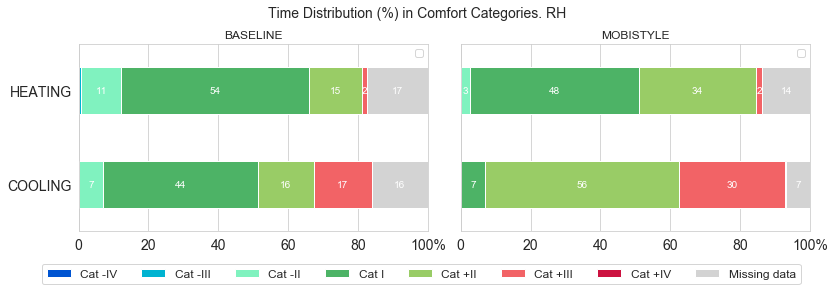

In [101]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11.7, 4), sharey=True)

# Group comfort catgory data for each period and season
df_cat_T = (data
            .groupby(['Monitoring_Period', 'Season']).apply(stats_category, 'Category_RH')
            .reset_index().set_index('Season')
           )
BL_T = df_cat_T.query('Monitoring_Period == "BASELINE"').loc[:, labels_T_RH + ['Missing data']]
MS_T = df_cat_T.query('Monitoring_Period == "MOBISTYLE"').loc[:, labels_T_RH + ['Missing data']]

# Plot
BL_T.plot(kind='barh', stacked=True, color=cmap_T_RH, legend='', ax=ax1)
MS_T.plot(kind='barh', stacked=True, color=cmap_T_RH, legend='', ax=ax2)

# Add percentage tect to bars
set_barh_text(BL_T, ax1)
set_barh_text(MS_T, ax2)

# Format Axes and Figure
for ax in (ax1, ax2):
    ax.set(xlim=(0,100), xticklabels=[0, 20, 40, 60, 80, '100%'], ylabel='')      
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.legend('')    
ax1.set_title('BASELINE')
ax2.set_title('MOBISTYLE')    

plt.suptitle(f'Time Distribution (%) in Comfort Categories. RH', fontsize=14)

# Add legend
fig.legend(labels_T_RH + ['Missing data'], loc='lower center', bbox_to_anchor=(0.5, 0.0), ncol=8, fontsize=12)

fig.tight_layout()
fig.subplots_adjust(top=0.85, bottom=0.2)

### Carbon dioxide comfort level
* Less seasonal differences for this IAQ parameter
* Similar time percentage distribution for both monitoring periods
* Slightly better IAQ levels for BASELINE

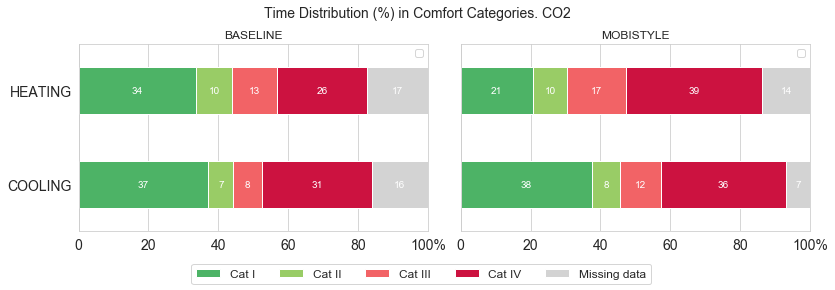

In [102]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11.7, 4), sharey=True)

# Group comfort catgory data for each period and season
df_cat_T = (data
            .groupby(['Monitoring_Period', 'Season']).apply(stats_category, 'Category_CO2')
            .reset_index().set_index('Season')
           )
BL_T = df_cat_T.query('Monitoring_Period == "BASELINE"').loc[:, labels_CO2_VOC+ ['Missing data']]
MS_T = df_cat_T.query('Monitoring_Period == "MOBISTYLE"').loc[:, labels_CO2_VOC + ['Missing data']]

# Plot
BL_T.plot(kind='barh', stacked=True, color=cmap_CO2_VOC, legend='', ax=ax1)
MS_T.plot(kind='barh', stacked=True, color=cmap_CO2_VOC, legend='', ax=ax2)

# Add percentage tect to bars
set_barh_text(BL_T, ax1)
set_barh_text(MS_T, ax2)

# Format Axes and Figure
for ax in (ax1, ax2):
    ax.set(xlim=(0,100), xticklabels=[0, 20, 40, 60, 80, '100%'], ylabel='')      
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.legend('')    
ax1.set_title('BASELINE')
ax2.set_title('MOBISTYLE')    

plt.suptitle(f'Time Distribution (%) in Comfort Categories. CO2', fontsize=14)

# Add legend
fig.legend(labels_CO2_VOC + ['Missing data'], loc='lower center', bbox_to_anchor=(0.5, 0.0), ncol=8, fontsize=12)

fig.tight_layout()
fig.subplots_adjust(top=0.85, bottom=0.2)

### Volatile organic compound comfort level
* Less seasonal differences for this IAQ parameter
* Similar time percentage distribution for both monitoring periods
* Slightly better IAQ levels for MOBISTYLE during the COOLING season

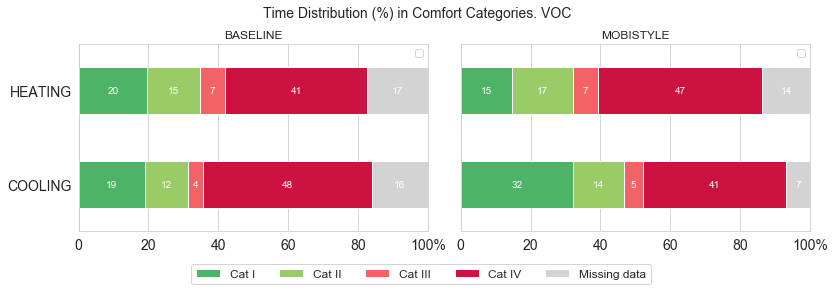

In [103]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11.7, 4), sharey=True)

# Group comfort catgory data for each period and season
df_cat_T = (data
            .groupby(['Monitoring_Period', 'Season']).apply(stats_category, 'Category_VOC')
            .reset_index().set_index('Season')
           )
BL_T = df_cat_T.query('Monitoring_Period == "BASELINE"').loc[:, labels_CO2_VOC+ ['Missing data']]
MS_T = df_cat_T.query('Monitoring_Period == "MOBISTYLE"').loc[:, labels_CO2_VOC + ['Missing data']]

# Plot
BL_T.plot(kind='barh', stacked=True, color=cmap_CO2_VOC, legend='', ax=ax1)
MS_T.plot(kind='barh', stacked=True, color=cmap_CO2_VOC, legend='', ax=ax2)

# Add percentage tect to bars
set_barh_text(BL_T, ax1)
set_barh_text(MS_T, ax2)

# Format Axes and Figure
for ax in (ax1, ax2):
    ax.set(xlim=(0,100), xticklabels=[0, 20, 40, 60, 80, '100%'], ylabel='')      
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.legend('')    
ax1.set_title('BASELINE')
ax2.set_title('MOBISTYLE')    

plt.suptitle(f'Time Distribution (%) in Comfort Categories. VOC', fontsize=14)

# Add legend
fig.legend(labels_CO2_VOC + ['Missing data'], loc='lower center', bbox_to_anchor=(0.5, 0.0), ncol=8, fontsize=12)

fig.tight_layout()
fig.subplots_adjust(top=0.85, bottom=0.2)

* RH, CO2 and VOC levels have more missing values, than the temperature measurements
* No clear evidence that MOBISTYLE periods improves IAQ time distribution in comfort categories

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

* From the univariate distribution it could be seen that some IAQ parameters have distributions with 2 peaks, indicating that either the data is different for each Season (HEATING, COOLING) or for each montiroing period (BASELINE, MOBISTYLE). Therefore in the following bivariate exploration

* From  the pairplot figure below it can be seen tha some air parameters have a clear seasonal distribution (Temperature, RH)

* Furthermore, it can be seen that CO2 levels are stronlgy correlated with VOC levels, and they have very staright line.

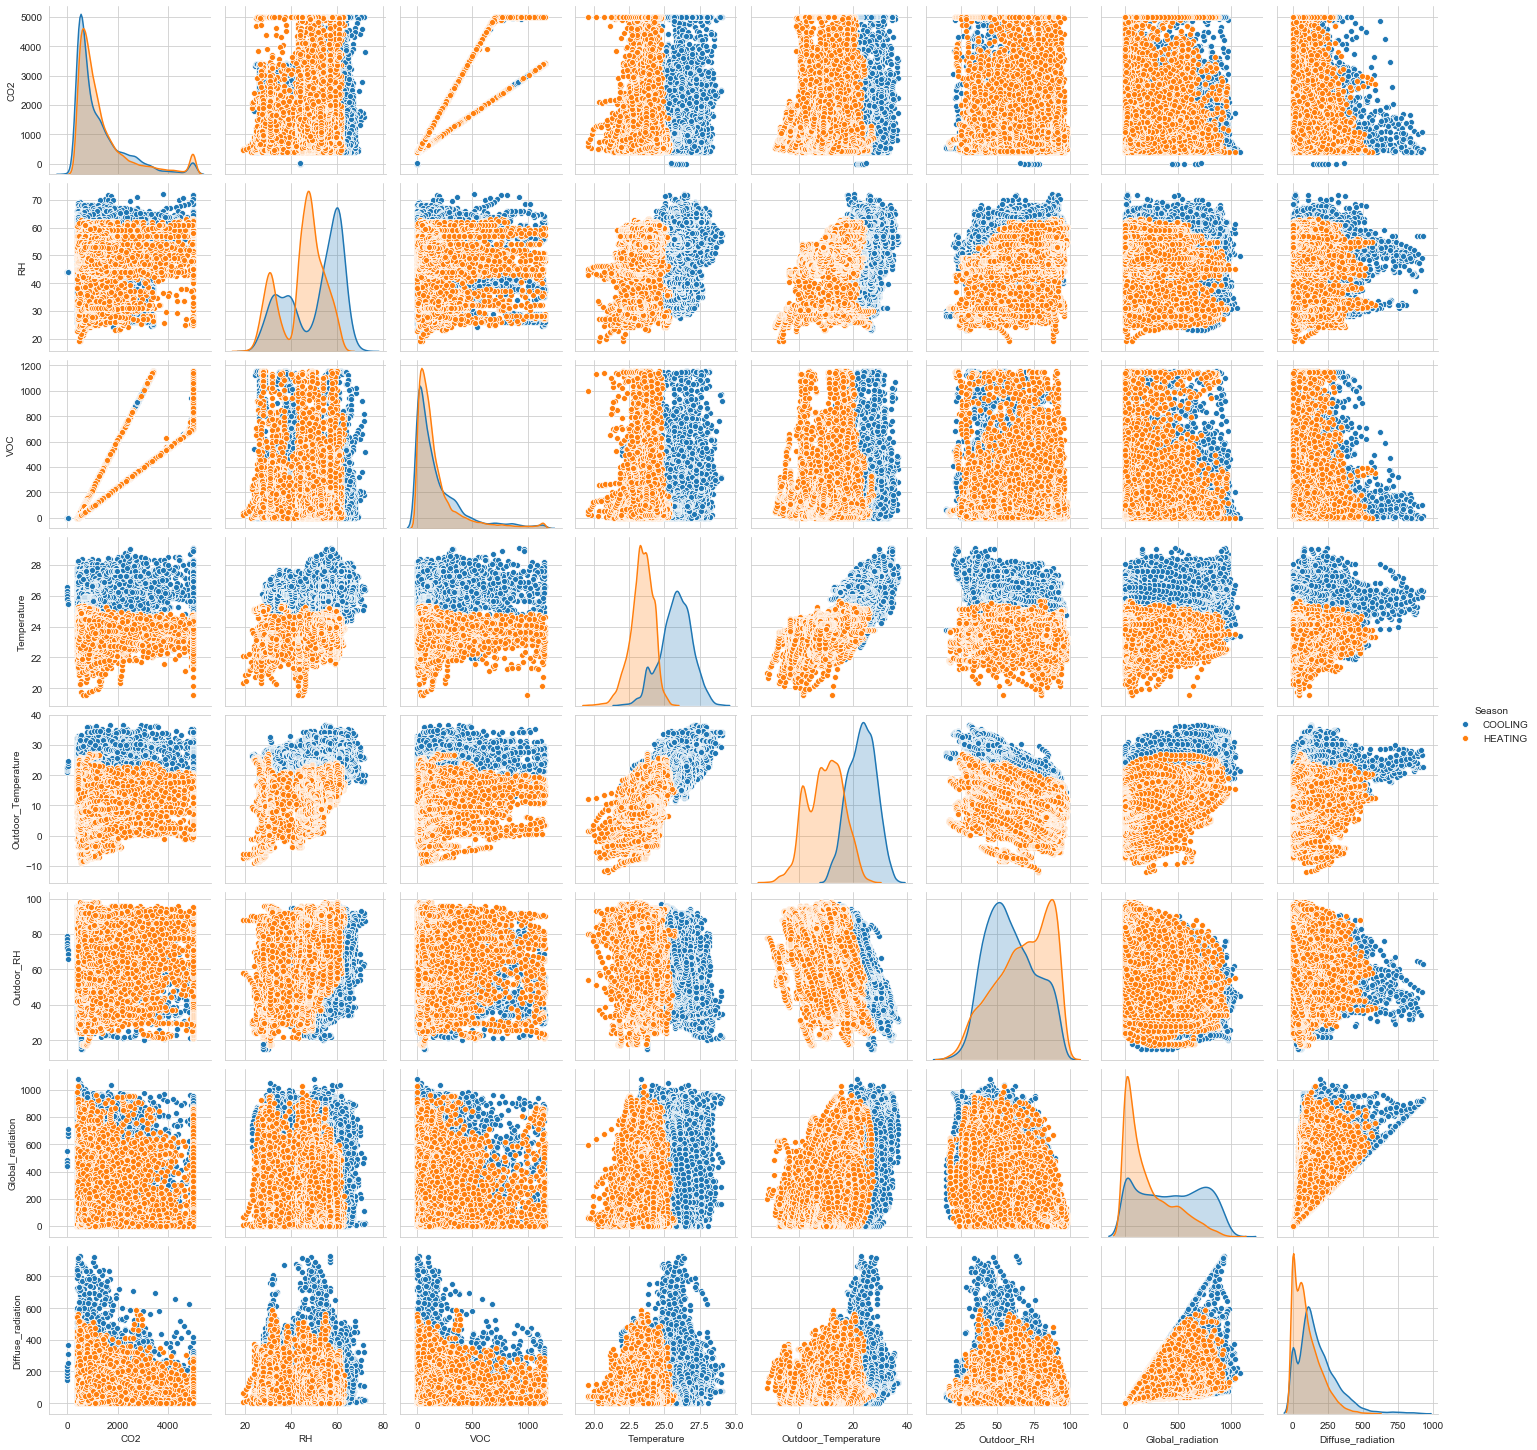

In [104]:
sns.pairplot(data.iloc[:, 3:], hue='Season');

### Grouping by monitoring period
* More equal distribution of the IAQ parameters can be observed in the figure below, than grouping by Season previously.

* Office RH has the largest distribution differences.

* Also, CO2 and VOC levels are clearly divided by monitorin period

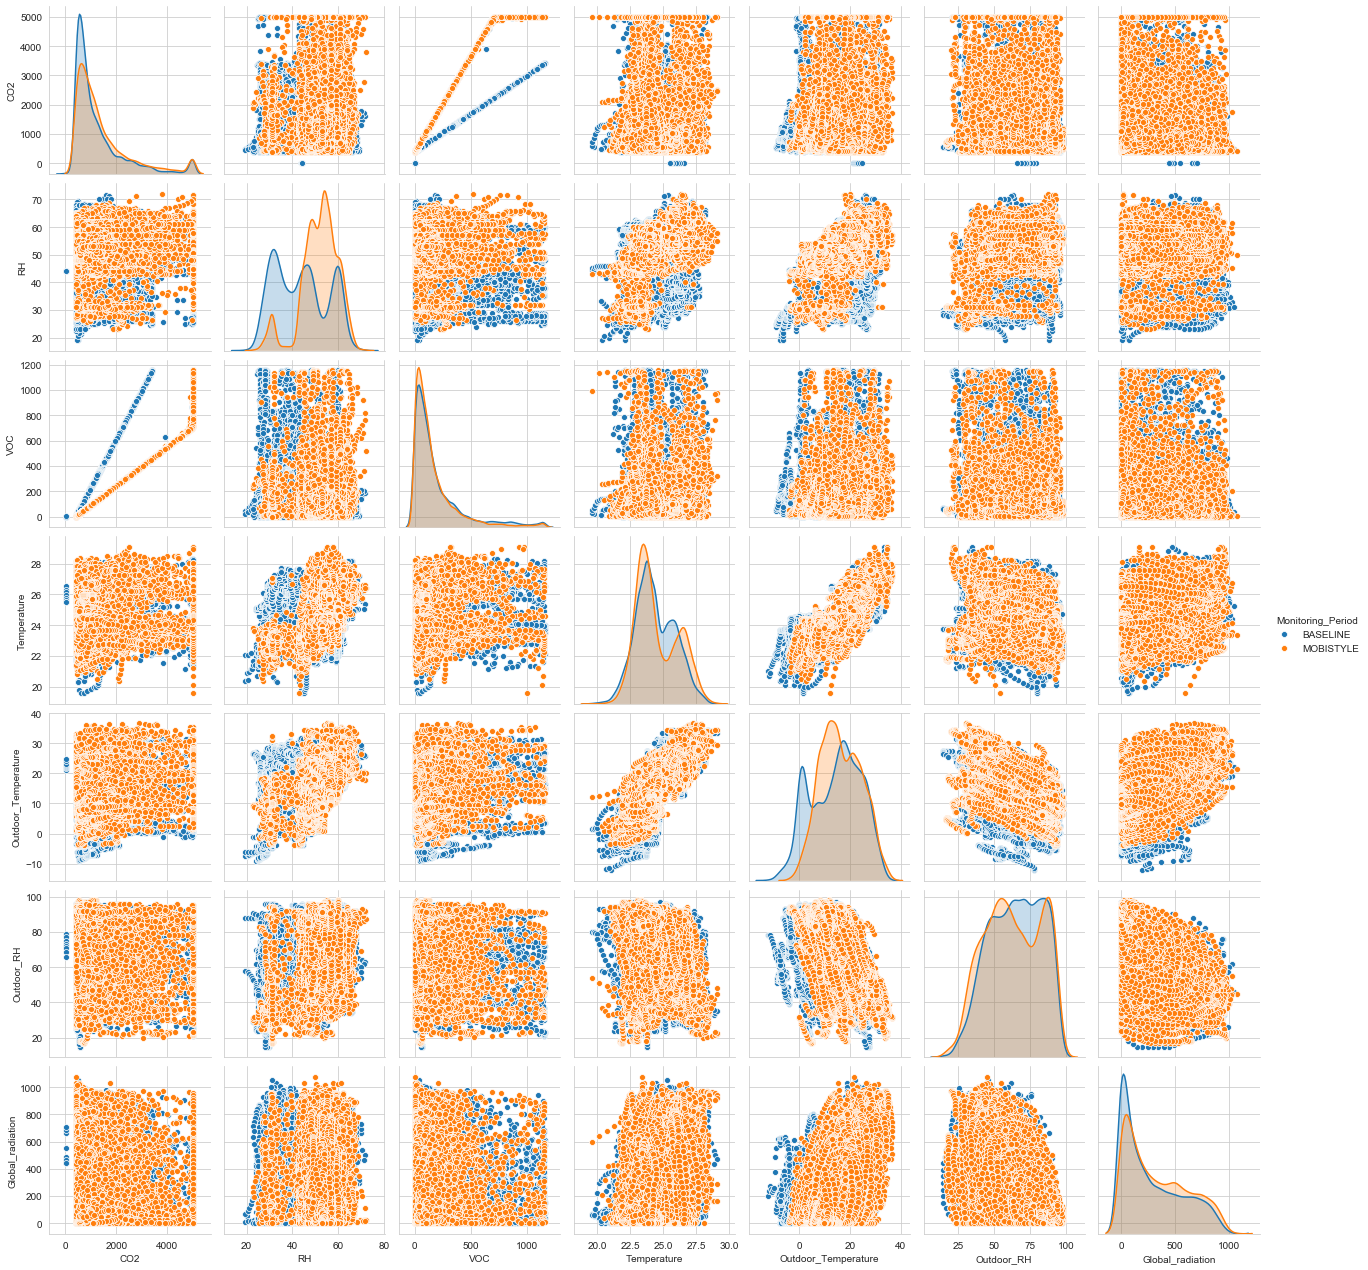

In [23]:
sns.pairplot(data.iloc[:, 3:-1], hue='Monitoring_Period');

### Outdoor vs Indoor Air Temperature
* As it could be observed from the previos bivariate plots, both indoor and outdoor temperatures are strongly correlated



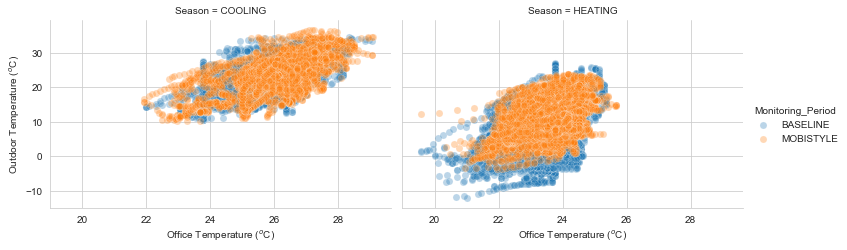

In [24]:
kws = dict(s=50, linewidth=.5, edgecolor="w", alpha=.3)
pal = dict(MOBISTYLE=color_MS, BASELINE=color_BL)

g = sns.FacetGrid(data, col='Season', hue='Monitoring_Period',
                  height=3.5, aspect=1.5, palette=pal)
g = (g.map(plt.scatter, 'Temperature', 'Outdoor_Temperature', **kws)
     .add_legend()
.set_axis_labels('Office Temperature ($^o$C)', 'Outdoor Temperature ($^o$C)')
    )

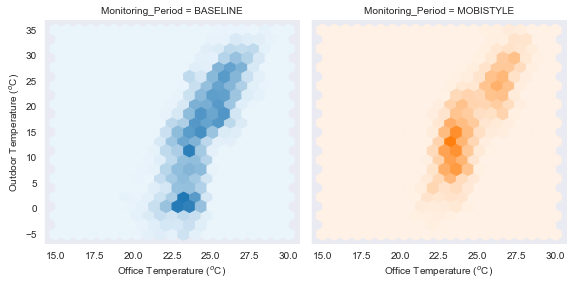

In [25]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=20, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(data, hue='Monitoring_Period', col='Monitoring_Period', height=4)
g = (g.map(hexbin, 'Temperature', 'Outdoor_Temperature', extent=[15, 30, -5, 35])
     .set_axis_labels('Office Temperature ($^o$C)', 'Outdoor Temperature ($^o$C)'));

### Outdoor vs Indoor Air Relative Humidity
* Also, RH showed many peaks in the univariate distribution plots

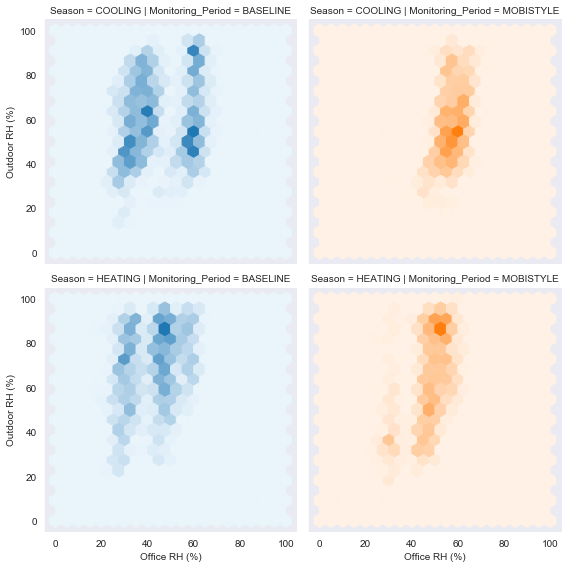

In [26]:
with sns.axes_style("dark"):
    g = sns.FacetGrid(data, hue='Monitoring_Period', col='Monitoring_Period', row='Season', height=4)
g = (g.map(hexbin, 'RH', 'Outdoor_RH', extent=[0, 100, 0, 100])
     .set_axis_labels('Office RH (%)', 'Outdoor RH (%)'));

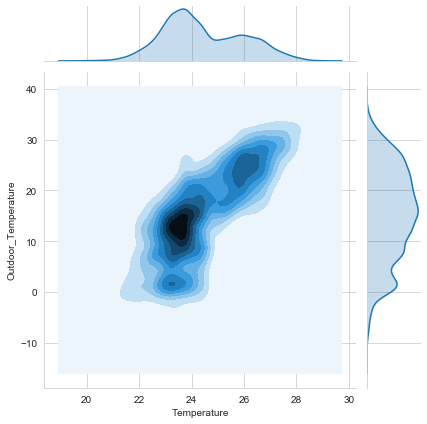

In [27]:
sns.jointplot(x='Temperature', y='Outdoor_Temperature', data=data, kind="kde");

### Correlation matrix
Calculate Spearmann's Correlation coefficient between all continuous numeric variables.

Daily average values - Include Window open data

In [28]:
# Select numeric variables, calculate daily mean values and include window state column
df_daily = data.iloc[:, np.r_[1, 3:9, 13:17]].resample('D').mean().dropna(how='all')
df_daily.loc[:'2019-02-1', 'Monitoring_Period'] = 'BASELINE'
df_daily.loc['2019-02-1': , 'Monitoring_Period'] = 'MOBISTYLE' 
# Correlation matrix for daily mean values
df_daily.corr()

Window_State       CO2        RH       VOC  Temperature  \
Window_State             1.000000 -0.117874  0.155021 -0.052867     0.353194   
CO2                     -0.117874  1.000000  0.187205  0.879217    -0.013421   
RH                       0.155021  0.187205  1.000000 -0.081554     0.424676   
VOC                     -0.052867  0.879217 -0.081554  1.000000     0.019135   
Temperature              0.353194 -0.013421  0.424676  0.019135     1.000000   
Outdoor_Temperature      0.507275  0.002170  0.511939  0.026345     0.805903   
Outdoor_RH              -0.248559  0.015565  0.160539 -0.019122    -0.245836   
Global_radiation         0.425472 -0.024964  0.176969  0.004042     0.569949   
Diffuse_radiation        0.359913 -0.096821  0.063500 -0.015736     0.371038   

                     Outdoor_Temperature  Outdoor_RH  Global_radiation  \
Window_State                    0.507275   -0.248559          0.425472   
CO2                             0.002170    0.015565         -0.024964   
RH                              0.511939    0.160539          0.176969   
VOC                             0.026345   -0.019122          0.004042   
Temperature                     0.805903   -0.245836          0.569949   
Outdoor_Temperature             1.000000   -0.418953          0.740804   
Outdoor_RH                     -0.418953    1.000000         -0.744549   
Global_radiation                0.740804   -0.744549          1.000000   
Diffuse_radiation               0.428757   -0.295372          0.508291   

                     Diffuse_radiation  
Window_State                  0.359913  
CO2                          -0.096821  
RH                            0.063500  
VOC                          -0.015736  
Temperature                   0.371038  
Outdoor_Temperature           0.428757  
Outdoor_RH                   -0.295372  
Global_radiation              0.508291  
Diffuse_radiation             1.000000

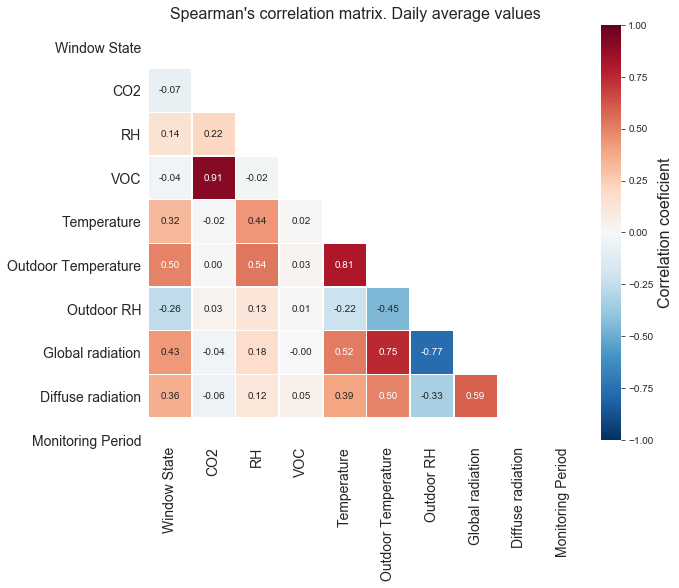

In [29]:
# Plot only upper matrix
fig, ax = plt.subplots(figsize=(11.7, 8.27))
mask = np.zeros_like(df_daily.corr(method='spearman'))
mask[np.triu_indices_from(mask)] = True

# Format labels
labels = [col.replace('_', ' ') for col in df_daily.columns]

hm = sns.heatmap(df_daily.corr(method='spearman'), square=True,
                 cmap='RdBu_r', linewidths=.5, annot=True, fmt='.2f',
                 xticklabels=labels, yticklabels=labels,
                 mask=mask, vmax=1., vmin=-1., ax=ax);
hm.figure.axes[-1].set_ylabel('Correlation coeficient', size=16)
hm.tick_params(labelsize=14)
hm.set_title("Spearman's correlation matrix. Daily average values", fontsize=16)

plt.tight_layout()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> As expected the office air temperature has a strong correlation with the outdoor air temperature

> Furthermore, window state - percentage of time when window is open - is also correlated with outdoor air temperaure - thus idicating seasonality. Therefore, in order to compare both monitoring periods, data must be compared for Heating and coling season separately. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> From correlation matrix it could be seen that some CO2 levels are stronlgy correlated with VOC levels, it means that both parameters are related to the indoor air polution from employees.

> Global radiation has strong negative correlation with Outdoor RH.

## Multivariate Exploration

* After Bivariate exploration, it could be seen that office air temperature is strongly correlated with outdoor air temperature and so does the window data time open data. In this section, all 3 parameters are combined into one plot and grouped by monitoring periods.

In [98]:
# Group by Monitoring period and season, resample and agregate daily mean values
data_daily = data.groupby(['Monitoring_Period', 'Season']).resample('D').mean().dropna(how='all').reset_index().set_index('Timestamp')
data_daily.head(3)

Monitoring_Period   Season  Room_Status  Window_State  \
Timestamp                                                          
2018-04-21          BASELINE  COOLING          1.0           0.0   
2018-04-22          BASELINE  COOLING          1.0           0.0   
2018-04-23          BASELINE  COOLING          1.0           0.0   

            Window_State_Change          CO2         RH         VOC  \
Timestamp                                                             
2018-04-21                  0.0   558.560330  30.314280   60.432099   
2018-04-22                  0.0   421.083619  28.361843    7.763120   
2018-04-23                  0.0  1342.440650  26.030512  360.549944   

            Temperature  Outdoor_Temperature  Outdoor_RH  Global_radiation  \
Timestamp                                                                    
2018-04-21     23.76233            18.986979   49.807292        300.083333   
2018-04-22     23.76233            18.948958   43.177083        296.750000   
2018-04-23     23.76233            18.985417   45.578125        288.812500   

            Diffuse_radiation  
Timestamp                      
2018-04-21          33.458333  
2018-04-22          44.000000  
2018-04-23          65.104167

### Outdoor vs Indoor Air Temperature vs Window Open
* BASELINE has more dark circles indicating that employees daily hold their windows open more

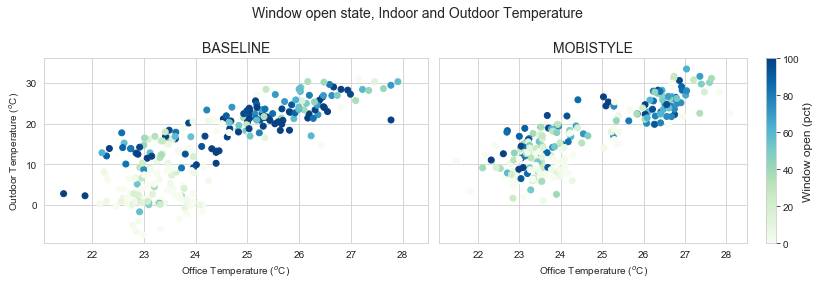

In [100]:
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(11.7, 4), sharey=True, sharex=True)

for period, ax in zip(['BASELINE', 'MOBISTYLE'], (ax1, ax2)):
    mask = (data_daily['Monitoring_Period'] == period)
    x, y = data_daily.loc[mask, 'Temperature'], data_daily.loc[mask, 'Outdoor_Temperature']
    z = data_daily.loc[mask, 'Window_State'] * 100
    sct = ax.scatter(x, y, c=z, cmap='GnBu')
    ax.set_title(period, size=14)
    ax.set(xlabel='Office Temperature ($^o$C)')
    
ax1.set_ylabel('Outdoor Temperature ($^o$C)')    
# Set color bar for Window State    
cbar = plt.colorbar(sct)
cbar.ax.set_ylabel('Window open (pct)', size=12, rotation=90, va='top')
cbar.ax.yaxis.set_ticks_position('right')
plt.suptitle('Window open state, Indoor and Outdoor Temperature', size=14)
plt.tight_layout()
fig.subplots_adjust(top=0.8)

<a id='summary'></a>
# Summary

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Office window opening time has a moderate strong correlation with outdoor air temperature. Similarly, office air temperature is related to the outdoor air temperature. This indicates clear seasonality of the dataset.

> 

### Were there any interesting or surprising interactions between features?

> I discovered that CO2 and VOC levels are strongly correlated with each other. This may indicate that the way this sensor is measuring is the same air particles.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!